In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from random import *
%matplotlib inline
plt.style.use('ggplot')

In [3]:
%run -i 'data_pipeline.py'

In [4]:
ratings_df

,movie,critic_score,audience_score,release_date,audience_tomatometer,critic_tomatometer,score_difference
0,The Invisible Man,91,88,"Feb 28, 2020",Fresh,Fresh,-3
1,The Way Back,83,84,"Mar 6, 2020",Fresh,Fresh,1
2,Never Rarely Sometimes Always,99,72,"Mar 13, 2020",Fresh,Fresh,-27
3,Bad Boys for Life,77,96,"Jan 17, 2020",Fresh,Fresh,19
4,Sonic the Hedgehog,64,93,"Feb 14, 2020",Fresh,Fresh,29
...,...,...,...,...,...,...,...
6331,The Adjustment Bureau,71,67,"Mar 4, 2011",Fresh,Fresh,-4
6332,Elektra Luxx,24,19,"Mar 11, 2011",Rotten,Rotten,-5
6333,Battle: Los Angeles,36,48,"Mar 11, 2011",Rotten,Rotten,12
6334,The Eagle,40,41,"Feb 11, 2011",Rotten,Rotten,1


# Hypothesis Test ( Are means the Same)

##### Null Hypothesis: The mean of the critic scores equals the mean of the audience scores.

##### Alternative Hypothesis: The mean of the critic scores does not equals the mean of the audience scores.

##### Significance Level= 0.05

In [6]:
ratings_df['critic_score'].mean(),ratings_df['audience_score'].mean()

(61.52872474747475, 57.72206439393939)

In [14]:
# Conduct a T-Test
stat,p_val=stats.ttest_ind(ratings_df['critic_score'],ratings_df['audience_score'])
stat,p_val

(8.62494752202684, 7.169805775366437e-18)

#### Reject Null. The mean of critic and audience scores are not equal.

# Hypothesis Test ( Are means within 5 points of each other)

##### Null Hypothesis: The mean critic score - The mean audience score <=5

##### Alternative Hypothesis: The mean critic score - the mean audience score is greater than   >5

##### Significance Level= 0.05

In [8]:
ratings_df['score_difference'].mean()

-3.8066603535353534

In [16]:
def ttest_range(range_,alpha):
    '''
        Tests if any values in range Fail to Reject the Null.
        
        Parameters: {Range: Range you are looking for.} {alpha: significance level.} 
        Returns: Reject Null or Fail to Reject Null with the difference that caused you to fail as well as the p value.

    
    '''
    count=0
    p_val_and_diff=[]
    for i in range(1,range_):
        stat,p_val=stats.ttest_ind(ratings_df['critic_score']-i,ratings_df['audience_score'])
        if p_val > alpha/range_:
            count+=1
            p_val_and_diff.append(p_val)
            p_val_and_diff.append(i)
            
    if count==0:
        print("Reject the Null")
    else:
        print(f"A difference of {p_val_and_diff[1]} with a p value of {p_val_and_diff[0]} causes us to Fail to Reject Null")
ttest_range(5,0.05)

A difference of 3 with a p value of 0.06761927387819971 causes us to Fail to Reject Null


#### Fail to Reject Null. The mean Audience score and Mean score are within 5 points of each other.

# What is the probability the scores are within 5 points

In [24]:
def prob_scores_within_range(range_):
    '''
        Calculates the probability that the audience score and critic score will be within a certain range of 
        each other.
        
        Parameters: {range_: The range you wish to compute}
        Returns: The probability that the audience score and critic score will be in that range.
    
    '''
    prob = round((abs(ratings_df['critic_score'] - ratings_df['audience_score'])<=range_).mean() * 100, 2)
    return prob

for i in np.arange(0,80,5):
    print(f'The probability that any given scores are within {i} points of each other is {prob_scores_within_range(i)}%')

The probability that any given scores are within 0 points of each other is 1.83%
The probability that any given scores are within 5 points of each other is 17.47%
The probability that any given scores are within 10 points of each other is 34.58%
The probability that any given scores are within 15 points of each other is 49.97%
The probability that any given scores are within 20 points of each other is 63.64%
The probability that any given scores are within 25 points of each other is 74.26%
The probability that any given scores are within 30 points of each other is 81.77%
The probability that any given scores are within 35 points of each other is 88.57%
The probability that any given scores are within 40 points of each other is 92.52%
The probability that any given scores are within 45 points of each other is 95.23%
The probability that any given scores are within 50 points of each other is 96.92%
The probability that any given scores are within 55 points of each other is 98.06%
The pro

####  The Audience score is within 5 points of the critic score 17.47% of the time.

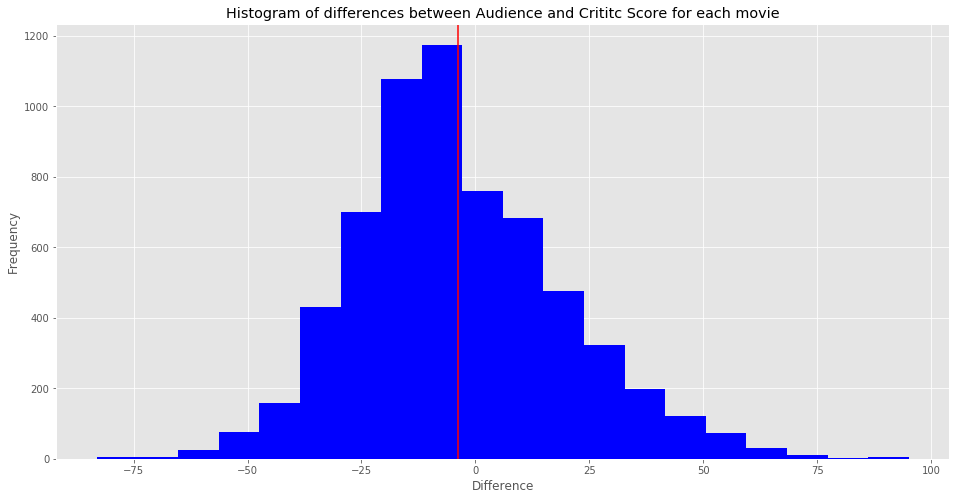

In [41]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
ax.hist(ratings_df['score_difference'],bins=20,color='b')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
ax.set_title("Histogram of differences between Audience and Crititc Score for each movie")
plt.savefig('score_diff_hist.png')
plt.axvline(x=-3.8,color='r')
plt.savefig('hist_diff.png')